In [89]:
import numpy as np
from scipy.stats import multivariate_normal as mv
from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import scipy
%matplotlib tk

## Part A

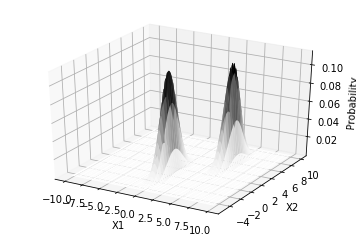

In [22]:
# Reference link: https://stackoverflow.com/a/38705297

# Creating normal functions
mu1 = np.transpose(np.array([0,0]))
mu2 = np.transpose(np.array([5,5]))

sigma = np.array([[0.25,0],[0,2]])
sigma = sigma.diagonal(0)

n1 = mv(mu1,sigma)
n2 = mv(mu2,sigma)

# Creating a grid
x1 = np.linspace(-10,10,500)
x2 = np.linspace(-5,10,500)
X1,X2 = np.meshgrid(x1,x2)
X = np.dstack((X1,X2))
Prob = 0.5*(n1.pdf(X)+n2.pdf(X))

# Plotting
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1,X2,Prob,cmap='Greys')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Probability')
plt.show()

## Part B

In [24]:
def probFunc(X):
    # Creating normal functions
    mu1 = np.transpose(np.array([0,0]))
    mu2 = np.transpose(np.array([5,5]))
    
    sigma = np.array([[0.25,0],[0,2]])
    sigma = sigma.diagonal(0)

    n1 = mv(mu1,sigma)
    n2 = mv(mu2,sigma)

    prob = 0.5*(n1.pdf(X)+n2.pdf(X))
    
    return prob


In [126]:
def mcmc(x_int,steps,step_size=[[5,0],[0,5]]):
    '''
    MCMC two multivariate normal distributions 
    x_int is the intial values
    steps are the number of steps
    step_size is how large the steps are
    
    Will show the plots of:
    Scatter Plots
    Trace of x1 and x2
    Histogram of x1 and x2
    Histogram of acceptance or rejection
    
    Returns the 2D array of x ([x1,x2]) and the mean
    '''
    # Setting up the walker
    sigma = np.array(step_size)
    sigma = sigma.diagonal(0)
    x = x_int
    x1 = []
    x2 = []
    accept = []
    
    # Doing the burn in using 10% of the steps
    for i in range(int(.1*steps)):
        x_prime = scipy.stats.multivariate_normal(x,sigma).rvs()
        prob = probFunc(x_prime)/probFunc(x)
        if prob > 1:
            x = x_prime 
        else: 
            rand = random.uniform(0,1)    
            if rand <= prob:
                x = x_prime
            else:
                x_prime = 0
    
    # Running the MCMC
    for i in range(steps):
        x_prime = scipy.stats.multivariate_normal(x,sigma).rvs()
        prob = probFunc(x_prime)/probFunc(x)
        
        # If higher prob is higher, accepts
        if prob > 1:
            x = x_prime
            x1.append(x[0])
            x2.append(x[1])
            accept.append(1)
        
        # If less than 1, draws a random int
        else: 
            rand = random.uniform(0,1)    
            if rand <= prob: # accepts
                x = x_prime
                x1.append(x[0])
                x2.append(x[1])
                accept.append(1)
            else: # rejects
                x_prime = 0
                x1.append(x[0])
                x2.append(x[1])
                accept.append(0)
    
    # putting everything into arrays
    x = np.array([x1,x2])
    mean = np.mean(x)

    # Plotting the scatter plot
    s = plt.figure(1)
    plt.scatter(x[0],x[1],color='black',s=.5)
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    s.show()
    
    # Plotting the trace
    steps = np.linspace(0,steps,steps)
    t, ax = plt.subplots(nrows=2,ncols=1,sharex=True)
    ax[0].plot(steps,x[0],color='black',label='$X_1$')
    ax[1].plot(steps,x[1],color='red',label='$X_2$')
    ax[0].set_ylabel('$X_1$')
    ax[1].set_ylabel('$X_2$')
    t.subplots_adjust(wspace=None)
    t.show()
    
    # Plotting the histogram of x1 and x2
    h = plt.figure(3)
    plt.hist(x[0],color='black',histtype='step',bins=100,label='$X_1$')
    plt.hist(x[1],color='red',histtype='step',bins=100,label='$X_2$')
    plt.legend(loc=0)
    h.show()
    
    # Plotting the acceptance
    h2 = plt.figure(4)
    plt.hist(accept,color='black',histtype='step')
    h2.show()
    
    return x,mean
    
    
    

In [120]:
x,mean = mcmc([10,10],10**4,step_size=[[6,0],[0,6]])
print(mean)